In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import matplotlib.pyplot as plt
import warnings

In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
! unzip '/content/drive/MyDrive/Credit_risk_model-main/loan_data_2007_2014.csv.zip' 

Archive:  /content/drive/MyDrive/Credit_risk_model-main/loan_data_2007_2014.csv.zip
  inflating: loan_data_2007_2014.csv  


#Loading Dataset

In [4]:
data = pd.read_csv("/content/loan_data_2007_2014.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#Data Pre-Processing

In [5]:
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.tail()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN
466284,466284,9199665,11061576,10000,10000,9975.0,36 months,19.20,367.58,D,...,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,NaN,NaN


In [7]:
print("Shape of the dataset " , data.shape)

Shape of the dataset  (466285, 75)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

$\text{There are 75 columns in the dataset.The columns contain 3 types of datatypes like float (discrete numerical) , int (integer) and object (categorical)}$.

In [18]:
data.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

In [8]:
data.describe (include = 'all')

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285,466285.000000,466285.000000,466285,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,337953,NaN,NaN,136929,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,NaN,13.829236,432.061201,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,NaN,4.357587,243.485550,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,NaN,5.420000,15.670000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,NaN,10.990000,256.690000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,NaN,13.660000,379.890000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,NaN,16.490000,566.580000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN


$\text{Checking datatypes of columns}$

In [19]:
float = 0
int = 0
object = 0
for col in data.columns :
  if data[col].dtype == "float64" :
    float +=1
  elif data[col].dtype == "int64" :
    int += 1
  elif data[col].dtype == "object" :
    object += 1
print(f"Total columns having float64 as datatype= {float} \nTotal columns having int64 as datatype = {int} \nTotal columns having object datatype = {object}")


Total columns having float64 as datatype= 46 
Total columns having int64 as datatype = 7 
Total columns having object datatype = 22


In [20]:
count = 0
missing = []
for col in data.columns :
  p = data[col].isna().mean()
  if p > 0.75 :
    missing.append(col)
    count += 1
    continue
print("Total columns with more than 75% missing values are =",count)
print("Those columns are : ",missing)

Total columns with more than 75% missing values are = 19
Those columns are :  ['mths_since_last_record', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']


$\text{We have 19 columns with more than 75% null values. We might remove them later after further analysis.}$

$\text{Detailed information of columns data}$

In [21]:
for col in data.columns.values :
  values = pd.unique(data[col])
  print("\033[1m" + col + "\033[0m" + " is of type " + "\033[1m"+str(data[col].dtypes) + "\033[0m" + " and has " + "\033[1m"+ str(len(values)) + "\033[0m" + " unique values " + "and " + "\033[1m" +str(data[col].isna().sum()) + "\033[0m" + " null values")
  if len(values) < 20 :
    lst = ''
    for i in range(0 , len(values)) :
      lst = lst + str(values[i]) + ' ,'
    print("These are : " , lst[0:len(lst)-2])

Unnamed: 0 is of type int64 and has 466285 unique values and 0 null values
id is of type int64 and has 466285 unique values and 0 null values
member_id is of type int64 and has 466285 unique values and 0 null values
loan_amnt is of type int64 and has 1352 unique values and 0 null values
funded_amnt is of type int64 and has 1354 unique values and 0 null values
funded_amnt_inv is of type float64 and has 9854 unique values and 0 null values
term is of type object and has 2 unique values and 0 null values
These are :   36 months , 60 months
int_rate is of type float64 and has 506 unique values and 0 null values
installment is of type float64 and has 55622 unique values and 0 null values
grade is of type object and has 7 unique values and 0 null values
These are :  B ,C ,A ,E ,F ,D ,G
sub_grade is of type object and has 35 unique values and 0 null values
emp_title is of type object and has 205476 unique values and 27588 null values
emp_length is of type object and has 12 unique values and 2

$\text{Droping columns with more than 80% null values.}$

In [22]:
new_data = data.dropna(axis = 1 , how = "all" , thresh = data.shape[0]*0.25)
pd.options.mode.chained_assignment = None
new_data.drop('Unnamed: 0' ,inplace = True , axis = 1)

In [25]:
new_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,171.62,NaN,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,649.91,NaN,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,357.48,NaN,Jan-15,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,67.79,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN


In [26]:
print("Shape of the new data after handling missing value columns : " , new_data.shape)

Shape of the new data after handling missing value columns :  (466285, 55)


In [27]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          466285 non-null  int64  
 1   member_id                   466285 non-null  int64  
 2   loan_amnt                   466285 non-null  int64  
 3   funded_amnt                 466285 non-null  int64  
 4   funded_amnt_inv             466285 non-null  float64
 5   term                        466285 non-null  object 
 6   int_rate                    466285 non-null  float64
 7   installment                 466285 non-null  float64
 8   grade                       466285 non-null  object 
 9   sub_grade                   466285 non-null  object 
 10  emp_title                   438697 non-null  object 
 11  emp_length                  445277 non-null  object 
 12  home_ownership              466285 non-null  object 
 13  annual_inc    

In [28]:
for col in new_data.columns.values :
  values = pd.unique(new_data[col])
  print("\033[1m" + col + "\033[0m" + " is of type " + "\033[1m"+str(new_data[col].dtypes) + "\033[0m" + " and has " + "\033[1m"+ str(len(values)) + "\033[0m" + " unique values " + "and " + "\033[1m" +str(new_data[col].isna().sum()) + "\033[0m" + " null values")
  if len(values) < 20 :
    lst = ''
    for i in range(0 , len(values)) :
      lst = lst + str(values[i]) + ' ,'
    print("These are : " , lst[0:len(lst)-2])

id is of type int64 and has 466285 unique values and 0 null values
member_id is of type int64 and has 466285 unique values and 0 null values
loan_amnt is of type int64 and has 1352 unique values and 0 null values
funded_amnt is of type int64 and has 1354 unique values and 0 null values
funded_amnt_inv is of type float64 and has 9854 unique values and 0 null values
term is of type object and has 2 unique values and 0 null values
These are :   36 months , 60 months
int_rate is of type float64 and has 506 unique values and 0 null values
installment is of type float64 and has 55622 unique values and 0 null values
grade is of type object and has 7 unique values and 0 null values
These are :  B ,C ,A ,E ,F ,D ,G
sub_grade is of type object and has 35 unique values and 0 null values
emp_title is of type object and has 205476 unique values and 27588 null values
emp_length is of type object and has 12 unique values and 21008 null values
These are :  10+ years ,< 1 year ,1 year ,3 years ,8 years

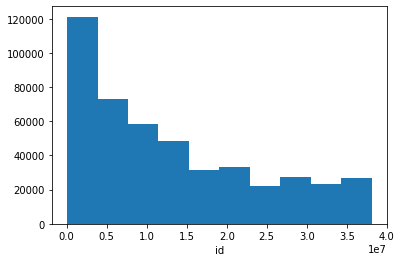

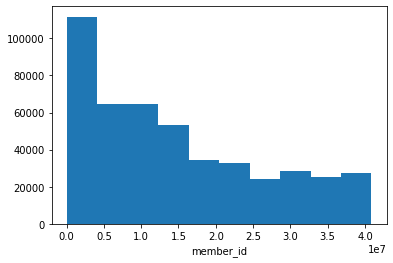

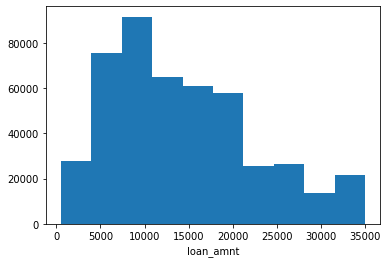

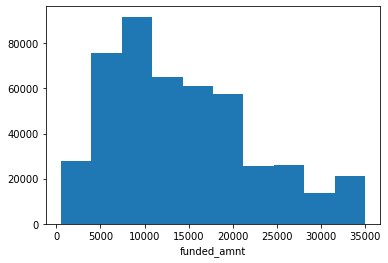

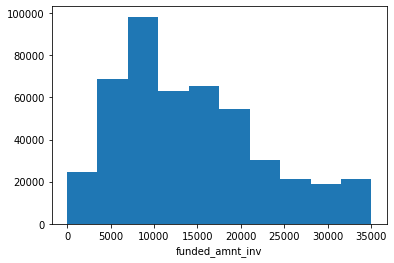

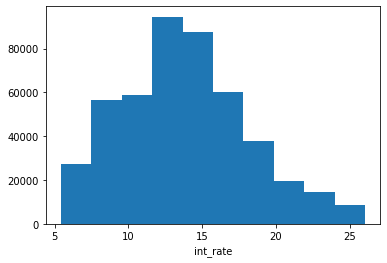

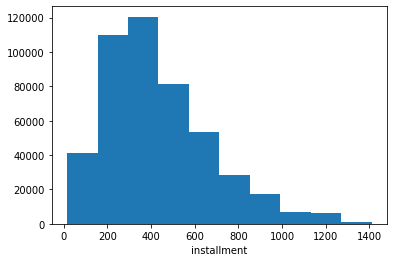

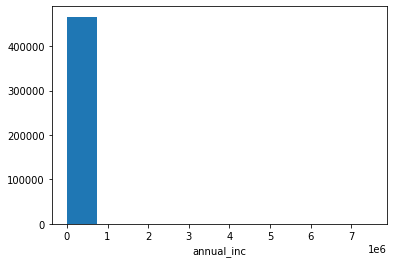

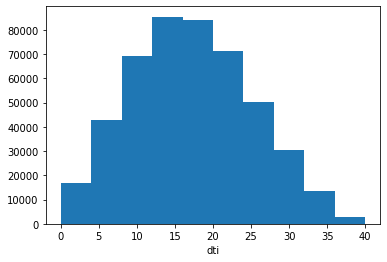

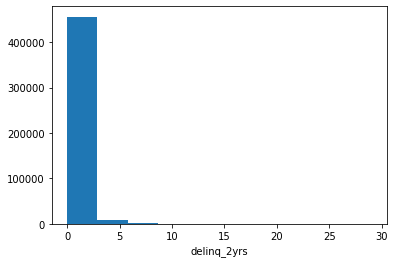

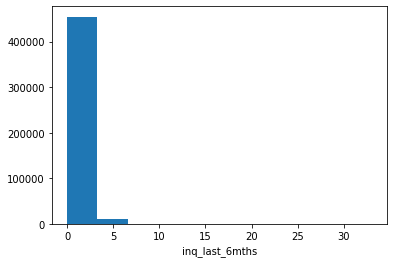

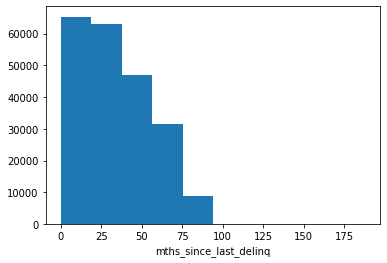

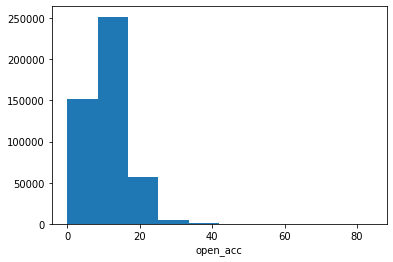

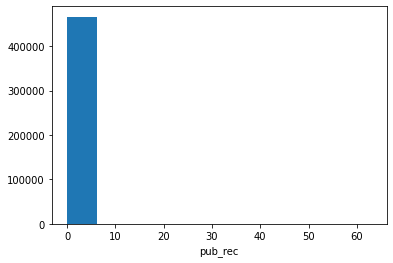

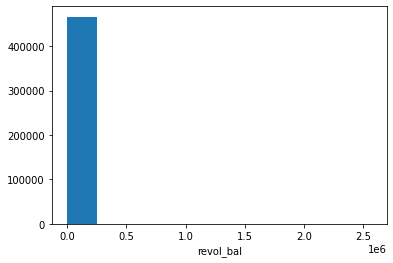

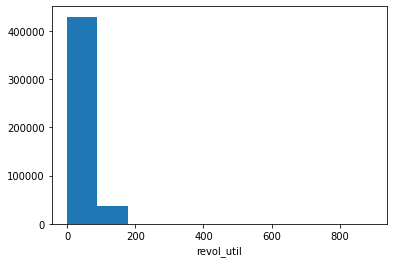

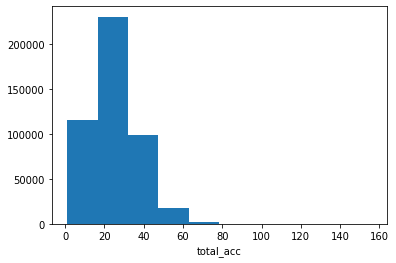

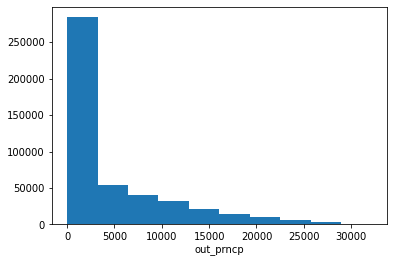

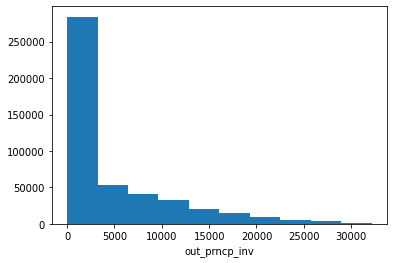

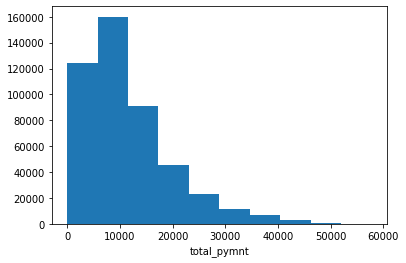

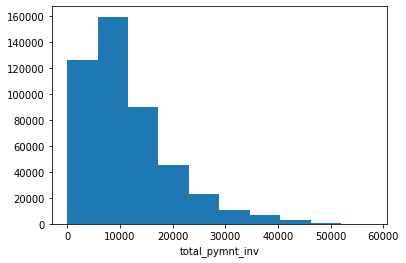

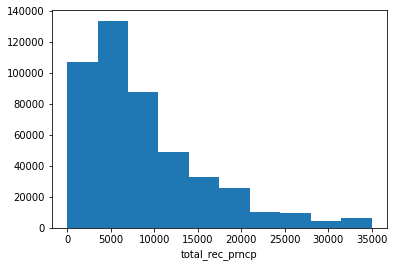

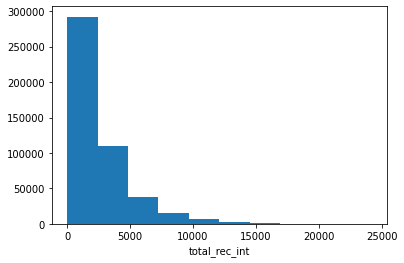

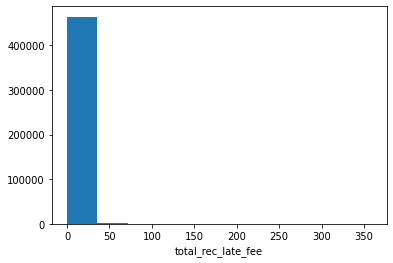

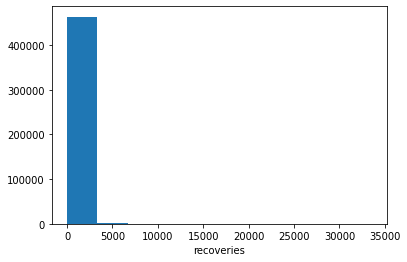

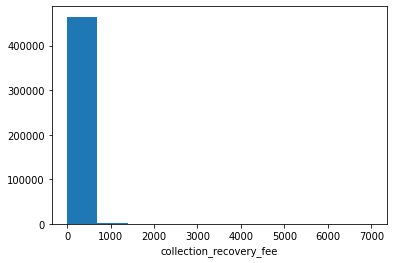

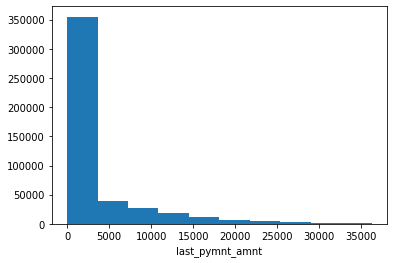

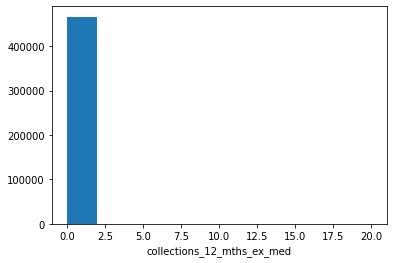

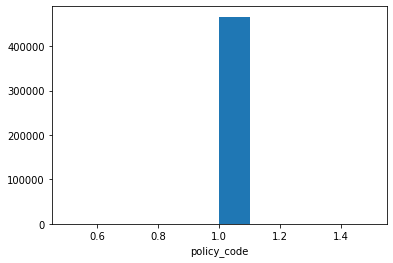

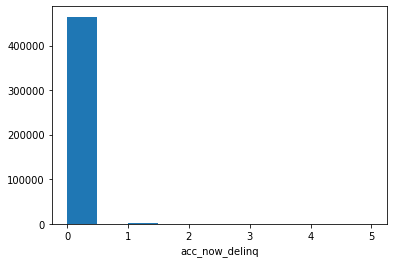

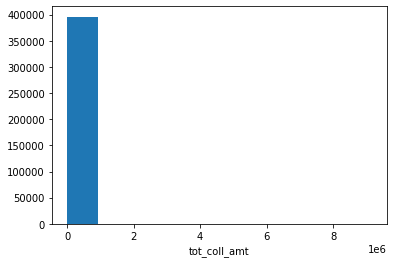

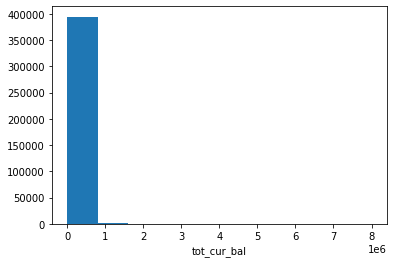

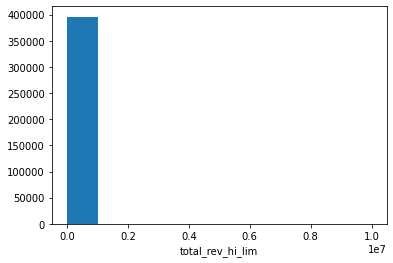

In [29]:
for col in new_data.columns.values :
  if (new_data[col].dtype == "int64")  | (new_data[col].dtype == "float64" ) :
    plt.hist(new_data[col])
    plt.xlabel(col)
    plt.show()

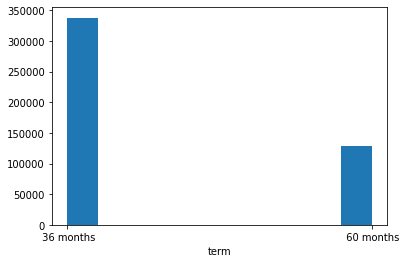

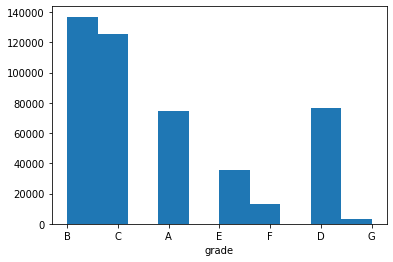

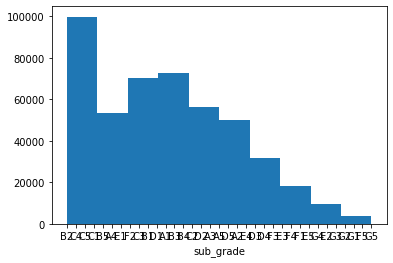

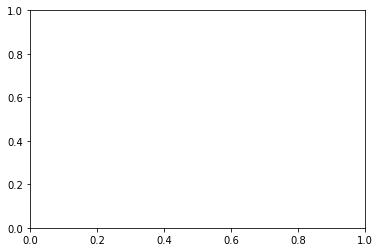

In [30]:
for col in new_data.columns.values :
  try:
    if (new_data[col].dtype == "object") :
      plt.hist(new_data[col])
      plt.xlabel(col)
      plt.show()
  except :
    continue

$\text{Dropping columns which are not much informative with respect to our prediction or which have very less variations in them or does not have much good spread in distribution.}$

In [31]:
new_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,171.62,NaN,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,649.91,NaN,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,357.48,NaN,Jan-15,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,67.79,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN


In [32]:
new_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')


Removing columns that have :

1. 19 features with more than 75% of missing values.Any technique to impute them will result in inaccurate results

2. Certain static features not related to credit risk, e.g., id, member_id, url, title
3. Other forward-looking features that are expected to be populated only once the borrower has defaulted, e.g., recoveries, collection_recovery_fee

In [33]:
new_data.drop(columns = ['id', 'member_id', 'sub_grade', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'next_pymnt_d','recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee'  , 'application_type'] , inplace=True)

In [34]:
print("The shape of data after dropping unnecessary columns : " , new_data.shape)

The shape of data after dropping unnecessary columns :  (466285, 41)


In [35]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  object 
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   grade                       466285 non-null  object 
 7   emp_length                  445277 non-null  object 
 8   home_ownership              466285 non-null  object 
 9   annual_inc                  466281 non-null  float64
 10  verification_status         466285 non-null  object 
 11  issue_d                     466285 non-null  object 
 12  loan_status                 466285 non-null  object 
 13  pymnt_plan    

In [36]:
for col in new_data.columns :
  if new_data[col].dtype == "object" :
    unique = pd.unique(new_data[col])
    if len(unique) < 15 :
      print("column " + col + " has " +str(len(unique)) + " unique values and they are :\n " + str(unique))
    else :
      print(col + str(len(unique)) + " values")


column term has 2 unique values and they are :
 [' 36 months' ' 60 months']
column grade has 7 unique values and they are :
 ['B' 'C' 'A' 'E' 'F' 'D' 'G']
column emp_length has 12 unique values and they are :
 ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
column home_ownership has 6 unique values and they are :
 ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
column verification_status has 3 unique values and they are :
 ['Verified' 'Source Verified' 'Not Verified']
issue_d91 values
column loan_status has 9 unique values and they are :
 ['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']
column pymnt_plan has 2 unique values and they are :
 ['n' 'y']
column purpose has 14 unique values and they are :
 ['credit_card' 'car' 'small_business' 'other' 'wedd

#Creating target variable for prediction

In [37]:
new_data['loan_status'].value_counts(normalize = True)

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

$\text{Customers are not considered good for business if they have status as either: Late (31-120 days), Default , Does not meet the credit policy, Status:Charged Off ,Charged Off}$
$\text{We encode such customers with 0 and others as 1 and make a new column of targets as good or bad customer.}$



In [38]:
new_data["good_bad"] = np.where(new_data.loc[:,'loan_status'].isin(['Charged Off' ,'Late (31-120 days)' ,'Default' , 'Does not meet the credit policy. Status:Charged Off']) , 0 , 1)

In [40]:
new_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_bad
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,...,Jan-15,171.62,Jan-16,0.0,1,0.0,NaN,NaN,NaN,1
1,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,...,Apr-13,119.66,Sep-13,0.0,1,0.0,NaN,NaN,NaN,0
2,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,...,Jun-14,649.91,Jan-16,0.0,1,0.0,NaN,NaN,NaN,1
3,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,...,Jan-15,357.48,Jan-15,0.0,1,0.0,NaN,NaN,NaN,1
4,3000,3000,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,...,Jan-16,67.79,Jan-16,0.0,1,0.0,NaN,NaN,NaN,1


In [41]:
new_data.drop(columns = 'loan_status' , inplace =True , axis = 1)

In [42]:
new_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_bad
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,...,Jan-15,171.62,Jan-16,0.0,1,0.0,NaN,NaN,NaN,1
1,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,...,Apr-13,119.66,Sep-13,0.0,1,0.0,NaN,NaN,NaN,0
2,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,...,Jun-14,649.91,Jan-16,0.0,1,0.0,NaN,NaN,NaN,1
3,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,...,Jan-15,357.48,Jan-15,0.0,1,0.0,NaN,NaN,NaN,1
4,3000,3000,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,...,Jan-16,67.79,Jan-16,0.0,1,0.0,NaN,NaN,NaN,1


#Train-Test Split

In [44]:
from sklearn.model_selection import train_test_split

$\text{Spliting data in 70:30 proportion resp. for training and testing.}$

In [45]:
# split data into 80/20 while keeping the distribution of bad loans in test set same as that in the pre-split dataset
X = new_data.drop('good_bad', axis = 1)
Y = new_data['good_bad']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42, stratify = Y) #splitting data in 70:30 proportion for training : testing
X_train, X_test = X_train.copy(), X_test.copy()

In [ ]:
print("shape of X_train : " , X_train.shape)
print("shape of X_test : " , X_test.shape)
print("shape of Y_train : " , Y_train.shape)
print("shape of Y_test : " , Y_test.shape)

shape of X_train :  (326399, 40)
shape of X_test :  (139886, 40)
shape of Y_train :  (326399,)
shape of Y_test :  (139886,)


#Encoding Categorical variables

In [46]:
dummy = pd.DataFrame()
for col in X_train.columns :
  if X_train[col].dtype == "object" :
    #print(col)
    dummy[col] = X_train[col]
dummy.head(3)

,term,grade,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,purpose,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d
447765,36 months,C,NaN,OWN,Verified,Feb-14,n,debt_consolidation,MI,Aug-95,w,Oct-14,Jan-16
353201,36 months,C,5 years,MORTGAGE,Verified,Jul-14,n,debt_consolidation,NH,Mar-99,f,Dec-15,Jan-16
464366,36 months,A,10+ years,MORTGAGE,Not Verified,Jan-14,n,credit_card,AR,Nov-92,f,Apr-14,Jan-16


$\text{We have four columns containing date that can be encoded using number of months since today.term column has only 2 values and can be encoded as 0,1 or left as it is.}$ $\text{The emp_length column has 12 unique categorical values and can be encoded as below.}$

In [49]:
print(pd.unique(dummy.emp_length))

[nan '5 years' '10+ years' '3 years' '< 1 year' '6 years' '2 years'
 '4 years' '8 years' '9 years' '7 years' '1 year']


$\text{So emp_length have 12 unique values of years.We can convert these values into numeric values indicating years instead of strings.}$$\text{ We will use pandas str.replace for converting these string to numeric.}$

In [50]:
#Handling string data
def emp_length2num(data , col) :
  """
  This function converts the string data into numerical data for columns ( here emp_length column) in dataframe

  """
  data[col] = data[col].str.replace('\+ years', '') #converting value 10+ years to 10
  data[col] = data[col].str.replace('< 1 year', str(0))
  data[col] = data[col].str.replace(' years', '') #converting values like 3 years/6 years/4 years/8 years ... etc to 3/6/4/8 respectively
  data[col] = data[col].str.replace(' year', '')
  data[col] = pd.to_numeric(data[col])
  data[col].fillna(value = 0 , inplace = True) #filling nan values with 0
  return data
  
#dqf = emp_length2num(dummy , 'emp_length')
#print(pd.unique(dqf.emp_length))

In [51]:
def convert_date2months(data , col) :
  """
  This function will convert the dates in column to number of months since day of running this code
  """
  from datetime import date
  today = pd.to_datetime(date.today()) #to get counts till date of today
  data[col] = pd.to_datetime(data[col] , format = '%b-%y') #convert date in columns to datetime
  data['months_since_' + col] = round(pd.to_numeric((today - data[col])/ np.timedelta64(1 , 'M'))) #Get months since todays date
  data['months_since_' + col] = data['months_since_' + col].apply(lambda x: data['months_since_' + col].max() if x < 0 else x) #removing any date that may have negative values due to misiing values
  data.drop(columns = [col] , inplace = True) #removing the column after getting the number of months since todays date
  return data


In [52]:
#The column term have only 2 unique values and they are in form of month in type string
#converting them to numeric 
def convert_term(data , col) :
  """
  The column term have only 2 unique values and they are in form of month in type string , converting them to numeric 
  """
  data[col] = data[col].str.replace(' months','')
  return data

In [53]:
dummy.head(2)

,term,grade,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,purpose,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d
447765,36 months,C,NaN,OWN,Verified,Feb-14,n,debt_consolidation,MI,Aug-95,w,Oct-14,Jan-16
353201,36 months,C,5 years,MORTGAGE,Verified,Jul-14,n,debt_consolidation,NH,Mar-99,f,Dec-15,Jan-16


In [54]:
X_train = convert_term(X_train , 'term')
X_train = convert_date2months(X_train , 'issue_d')
X_train = convert_date2months(X_train , 'earliest_cr_line' )
X_train = convert_date2months(X_train , 'last_pymnt_d' )
X_train = convert_date2months(X_train , 'last_credit_pull_d')
X_train = emp_length2num(X_train , 'emp_length')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


In [55]:
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,months_since_issue_d,months_since_earliest_cr_line,months_since_last_pymnt_d,months_since_last_credit_pull_d
447765,7975,7975,7975.0,36,16.24,281.33,C,0.0,OWN,19000.0,...,0.0,1,0.0,0.0,10638.0,20600.0,102.0,324.0,94.0,79.0
353201,24000,24000,24000.0,36,14.99,831.86,C,5.0,MORTGAGE,90000.0,...,0.0,1,0.0,50.0,311058.0,27300.0,97.0,281.0,80.0,79.0
464366,15000,15000,15000.0,36,7.90,469.36,A,10.0,MORTGAGE,56780.0,...,0.0,1,0.0,292.0,110235.0,21100.0,103.0,357.0,100.0,79.0
371319,35000,35000,35000.0,60,19.52,917.97,E,10.0,MORTGAGE,200000.0,...,0.0,1,0.0,0.0,438235.0,46200.0,98.0,269.0,79.0,79.0
119920,12000,12000,11975.0,36,14.33,412.06,C,3.0,MORTGAGE,65000.0,...,0.0,1,0.0,0.0,53945.0,109100.0,109.0,232.0,79.0,79.0


In [56]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326399 entries, 447765 to 38736
Data columns (total 40 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   loan_amnt                        326399 non-null  int64  
 1   funded_amnt                      326399 non-null  int64  
 2   funded_amnt_inv                  326399 non-null  float64
 3   term                             326399 non-null  object 
 4   int_rate                         326399 non-null  float64
 5   installment                      326399 non-null  float64
 6   grade                            326399 non-null  object 
 7   emp_length                       326399 non-null  float64
 8   home_ownership                   326399 non-null  object 
 9   annual_inc                       326395 non-null  float64
 10  verification_status              326399 non-null  object 
 11  pymnt_plan                       326399 non-null  object 
 12

In [57]:
for col in X_train.columns :
  if X_train[col].dtype == "object" :
    unique = pd.unique(X_train[col])
    if 2 < len(unique) < 15 :
      print("column " + col + " has " +str(len(unique)) + " unique values and they are :\n " + str(unique))
    else :
      print(col + ' has ' + str(len(unique)) + " values")

term has 2 values
column grade has 7 unique values and they are :
 ['C' 'A' 'E' 'B' 'D' 'F' 'G']
column home_ownership has 5 unique values and they are :
 ['OWN' 'MORTGAGE' 'RENT' 'OTHER' 'NONE']
column verification_status has 3 unique values and they are :
 ['Verified' 'Not Verified' 'Source Verified']
pymnt_plan has 2 values
column purpose has 14 unique values and they are :
 ['debt_consolidation' 'credit_card' 'home_improvement' 'other' 'car'
 'small_business' 'major_purchase' 'medical' 'wedding' 'house' 'moving'
 'vacation' 'educational' 'renewable_energy']
addr_state has 50 values
initial_list_status has 2 values


In [58]:
X_train.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,months_since_issue_d,months_since_earliest_cr_line,months_since_last_pymnt_d,months_since_last_credit_pull_d
count,326399.000000,326399.000000,326399.000000,326399.000000,326399.000000,326399.000000,3.263950e+05,326399.000000,326374.000000,326374.000000,...,326293.000000,326399.0,326374.000000,2.772030e+05,2.772030e+05,2.772030e+05,326399.000000,326374.000000,326124.000000,326371.000000
mean,14318.758176,14293.178901,14223.962197,13.827258,432.007236,5.730385,7.333757e+04,17.225004,0.285105,0.804387,...,0.009044,1.0,0.003968,2.057582e+02,1.391570e+05,3.042075e+04,107.254701,298.264758,87.298638,83.038217
std,8288.171665,8276.352786,8299.440535,4.354233,243.307778,3.752737,5.638405e+04,7.846518,0.796744,1.092506,...,0.111387,0.0,0.068510,1.746275e+04,1.525492e+05,4.005312e+04,14.344117,86.385333,12.814004,9.623511
min,500.000000,500.000000,0.000000,5.420000,15.670000,0.000000,2.000000e+03,0.000000,0.000000,0.000000,...,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,92.000000,129.000000,79.000000,79.000000
25%,8000.000000,8000.000000,8000.000000,10.990000,256.870000,2.000000,4.500000e+04,11.380000,0.000000,0.000000,...,0.000000,1.0,0.000000,0.000000e+00,2.869500e+04,1.350000e+04,97.000000,239.000000,79.000000,79.000000
50%,12000.000000,12000.000000,12000.000000,13.660000,379.860000,6.000000,6.300000e+04,16.880000,0.000000,0.000000,...,0.000000,1.0,0.000000,0.000000e+00,8.202400e+04,2.280000e+04,103.000000,281.000000,80.000000,79.000000
75%,20000.000000,20000.000000,19950.000000,16.490000,566.520000,10.000000,8.900000e+04,22.790000,0.000000,1.000000,...,0.000000,1.0,0.000000,0.000000e+00,2.094375e+05,3.790000e+04,113.000000,341.000000,91.000000,81.000000
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,10.000000,7.500000e+06,39.990000,29.000000,33.000000,...,20.000000,1.0,5.000000,9.152545e+06,8.000078e+06,9.999999e+06,182.000000,643.000000,176.000000,183.000000


#Feature Selection using chi-square and ANOVA

$\text{We will perform chi-squared test for categorical features and ANOVA F-statistic for numeric features, For selecting most suitable features from the datasets}$

$\text{For performing the above mention tests on data we will separate the categorical features from numeric features.}$

In [59]:
X_train_obj = X_train.select_dtypes(include= 'object').copy() #creating copy so that original data is not harmed
X_train_num = X_train.select_dtypes(include='number').copy() #creating copy so that original data is not harmed

In [60]:
from sklearn.feature_selection import f_classif #to perform ANOVA F-statistic
from scipy.stats import chi2_contingency #to perform chi-square test

In [61]:
def chi_test(data) :
  """ Perform chi-square test for data """

  chi_test = {} #to store p value of each feature

  for col in X_train_obj.columns :
    chi2 , p , dos , exp_freq = chi2_contingency(pd.crosstab(Y_train , X_train_obj[col])) 
    #crosstab gives frequency table of given factors by cross tabulation
    #chi2_contingency returns 4 values i.e. chi2 : test statistic , p : p value of test , dof : degree of freedom , exp_freq : expected frequency
    chi_test.setdefault('feature',[]).append(col)
    chi_test.setdefault('p-value',[]).append(round(p,5))

    results = pd.DataFrame(data= chi_test)
    results.sort_values(by = ['p-value'] , ascending= True ,ignore_index = True , inplace=True)

  return results

In [62]:
def anova_statistic(data , label):
  """ perform ANOVA F-statistic for data """
  
  warnings.filterwarnings("ignore")

  #first we need to handle missing values , for simplicity we will replace missing value by mean value of the column
  data.fillna(data.mean() , inplace=True)

  f_stat , p = f_classif(data , label) #gives F-statistic and p-value for each feature ,when provided data and target label

  #creating ANOVA table for features , f_stat , p-value
  anova = {'Feature' : data.columns.values , 'F-score' : f_stat , 'p-value' : p.round(decimals=5)}

  results = pd.DataFrame(anova)
  results.sort_values(by = ['F-score'] , ascending=False,ignore_index = True , inplace = True)

  return results


In [63]:
chi_result = chi_test(X_train_obj)
print("results of chi-square test on categorical features")
display(chi_result)

results of chi-square test on categorical features


,feature,p-value
0,term,0.00000
1,grade,0.00000
2,home_ownership,0.00000
3,verification_status,0.00000
4,purpose,0.00000
5,addr_state,0.00000
6,initial_list_status,0.00000
7,pymnt_plan,0.00511


$\text{Low p value signifies great statistical significance and our features are statistically important.}$$\text{Here all categorical features seems important but for sake of reducing complexity , we will consider first 4 features and see how our model performs}$

In [64]:
anova_result = anova_statistic(X_train_num , Y_train)
print("results of ANOVA-F statistic on numeric features")
display(anova_result)

results of ANOVA-F statistic on numeric features


,Feature,F-score,p-value
0,months_since_last_pymnt_d,20635.847387,0.00000
1,total_pymnt_inv,12884.495065,0.00000
2,total_pymnt,12793.058134,0.00000
3,int_rate,10103.915879,0.00000
4,last_pymnt_amnt,9479.514404,0.00000
5,out_prncp,8369.729943,0.00000
6,out_prncp_inv,8368.244737,0.00000
7,months_since_last_credit_pull_d,6147.271730,0.00000
8,months_since_issue_d,2488.633910,0.00000
9,inq_last_6mths,1721.268395,0.00000


$\text{Large F value in ANOVA translates to high statstical significance and low p value indicate High statistical significance.}$
$\text{Here we will keep first 19 features as they have high F value and low p value. Also we will look for correlation in these 19 features}$

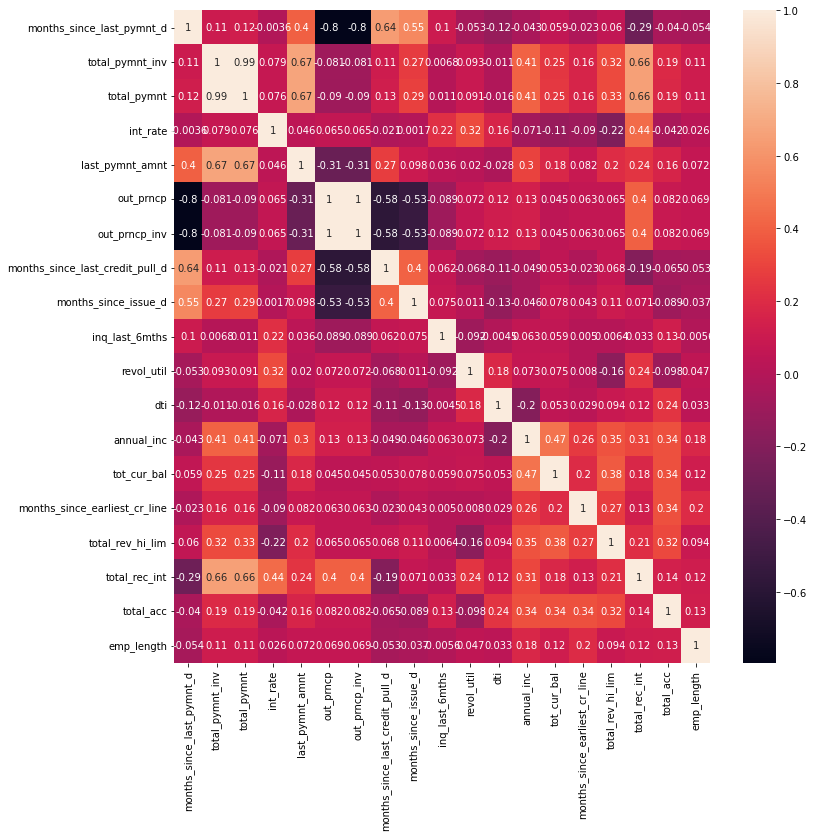

In [65]:
#Lets look for pair-wise correlations for the numerical features
imp_feat = anova_result.iloc[:19,0].to_list()
corr = X_train_num[imp_feat].corr(method='spearman')
plt.figure(figsize=(12,12))
sns.heatmap(corr , annot=True)

$\text{As we can see out_prncp and out_prncp_inv has high correlation, similiarly total_pymnt_inv and total_pymnt has high correlation.}$$\text{ We can remove any one from each of the two groups.}$

In [66]:
#creating list of columns to drop
col_to_drop = anova_result.iloc[19:,0].to_list()
col_to_drop.extend(chi_result.iloc[4:,0].to_list())
col_to_drop.extend(['total_pymnt_inv' , 'out_prncp_inv'])
def drop_columns(data , col_list):
  """ This function drops columns in a col_list from given dataframe data """
  data.drop(columns=col_list , inplace=True)
drop_columns(X_train , col_to_drop)

In [67]:
X_train.head(5)

,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,dti,inq_last_6mths,revol_util,...,out_prncp,total_pymnt,total_rec_int,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim,months_since_issue_d,months_since_earliest_cr_line,months_since_last_pymnt_d,months_since_last_credit_pull_d
447765,36,16.24,C,0.0,OWN,19000.0,Verified,33.23,1.0,51.6,...,0.00,2250.64000,795.91,281.33,10638.0,20600.0,102.0,324.0,94.0,79.0
353201,36,14.99,C,5.0,MORTGAGE,90000.0,Verified,21.43,1.0,97.2,...,13992.07,14141.62000,4133.69,831.86,311058.0,27300.0,97.0,281.0,80.0,79.0
464366,36,7.90,A,10.0,MORTGAGE,56780.0,Not Verified,11.96,1.0,29.5,...,0.00,15288.77132,288.77,14350.73,110235.0,21100.0,103.0,357.0,100.0,79.0
371319,60,19.52,E,10.0,MORTGAGE,200000.0,Source Verified,9.97,0.0,82.4,...,27310.63,17441.43000,9752.06,917.97,438235.0,46200.0,98.0,269.0,79.0,79.0
119920,36,14.33,C,3.0,MORTGAGE,65000.0,Source Verified,26.63,3.0,37.4,...,2379.13,12351.44000,2730.57,412.06,53945.0,109100.0,109.0,232.0,79.0,79.0


In [68]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326399 entries, 447765 to 38736
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   term                             326399 non-null  object 
 1   int_rate                         326399 non-null  float64
 2   grade                            326399 non-null  object 
 3   emp_length                       326399 non-null  float64
 4   home_ownership                   326399 non-null  object 
 5   annual_inc                       326395 non-null  float64
 6   verification_status              326399 non-null  object 
 7   dti                              326399 non-null  float64
 8   inq_last_6mths                   326374 non-null  float64
 9   revol_util                       326164 non-null  float64
 10  total_acc                        326374 non-null  float64
 11  out_prncp                        326399 non-null  float64
 12

$\text{We still have 3 columns with categorical variables like grade , verification_status , home_ownership.We will encode them using dummy variables.}$

In [69]:
X_train.columns

Index(['term', 'int_rate', 'grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'dti', 'inq_last_6mths',
       'revol_util', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_int',
       'last_pymnt_amnt', 'tot_cur_bal', 'total_rev_hi_lim',
       'months_since_issue_d', 'months_since_earliest_cr_line',
       'months_since_last_pymnt_d', 'months_since_last_credit_pull_d'],
      dtype='object')

##Dummy encoding for categorical data

In [70]:
#function to create dummies
def create_dummy(data , column_list):
  """ create dummy encoding for given column in data """
  dummy_list = []
  for col in column_list :
    dummy_list.append(pd.get_dummies(data = data[col] , prefix = col , prefix_sep=":"))
  dummy_list = pd.concat(dummy_list, axis=1)
  data = pd.concat([data , dummy_list] , axis=1)
  return data

X_train = create_dummy(X_train , ['grade', 'home_ownership', 'verification_status'])

In [ ]:
X_train

,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,dti,inq_last_6mths,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim,months_since_issue_d,months_since_earliest_cr_line,months_since_last_pymnt_d,months_since_last_credit_pull_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified
447765,36,16.24,C,0.0,OWN,19000.0,Verified,33.23,1.0,51.6,23.0,0.00,2250.64000,795.91,281.33,10638.0,20600.0,90.0,313.0,82.0,67.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
353201,36,14.99,C,5.0,MORTGAGE,90000.0,Verified,21.43,1.0,97.2,32.0,13992.07,14141.62000,4133.69,831.86,311058.0,27300.0,86.0,270.0,69.0,67.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
464366,36,7.90,A,10.0,MORTGAGE,56780.0,Not Verified,11.96,1.0,29.5,34.0,0.00,15288.77132,288.77,14350.73,110235.0,21100.0,91.0,345.0,89.0,67.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
371319,60,19.52,E,10.0,MORTGAGE,200000.0,Source Verified,9.97,0.0,82.4,48.0,27310.63,17441.43000,9752.06,917.97,438235.0,46200.0,87.0,258.0,67.0,67.0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
119920,36,14.33,C,3.0,MORTGAGE,65000.0,Source Verified,26.63,3.0,37.4,56.0,2379.13,12351.44000,2730.57,412.06,53945.0,109100.0,98.0,221.0,67.0,67.0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200367,36,14.09,B,6.0,RENT,41800.0,Not Verified,22.85,2.0,83.7,12.0,0.00,12622.32274,2122.32,4363.17,19021.0,12200.0,107.0,196.0,83.0,77.0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
370650,36,8.39,A,10.0,MORTGAGE,95000.0,Not Verified,10.80,0.0,77.8,26.0,9063.16,10778.70000,1841.86,567.30,316915.0,24200.0,87.0,357.0,67.0,67.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
214819,36,14.65,C,9.0,MORTGAGE,65000.0,Source Verified,11.63,1.0,74.8,16.0,0.00,22692.16261,3692.16,9601.36,NaN,NaN,110.0,239.0,90.0,67.0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
27751,60,15.58,D,2.0,RENT,30000.0,Source Verified,20.36,0.0,61.0,22.0,0.00,17698.79546,5448.80,312.75,NaN,NaN,134.0,232.0,73.0,67.0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [71]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326399 entries, 447765 to 38736
Data columns (total 36 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   term                                 326399 non-null  object 
 1   int_rate                             326399 non-null  float64
 2   grade                                326399 non-null  object 
 3   emp_length                           326399 non-null  float64
 4   home_ownership                       326399 non-null  object 
 5   annual_inc                           326395 non-null  float64
 6   verification_status                  326399 non-null  object 
 7   dti                                  326399 non-null  float64
 8   inq_last_6mths                       326374 non-null  float64
 9   revol_util                           326164 non-null  float64
 10  total_acc                            326374 non-null  float64
 11  out_prncp

$\Large \textbf{With this our training data is pre-processed and cleaned to train for model}$

$\text{Applying the same cleaning procedure on test data.}$

In [72]:
X_test = emp_length2num(X_test , 'emp_length')
X_test = convert_date2months(X_test , 'earliest_cr_line')
X_test = convert_date2months(X_test , 'last_credit_pull_d')
X_test = convert_date2months(X_test , 'issue_d')
X_test = convert_date2months(X_test , 'last_pymnt_d')
X_test = convert_term(X_test , 'term')
drop_columns(X_test , col_to_drop)
X_test = create_dummy(X_test , ['grade', 'home_ownership', 'verification_status'])

#ensuring all columns in train data are their in test data by re-indexing
X_test = X_test.reindex(labels= X_train.columns , axis = 1 , fill_value=0)

$\text{Now our data is ready storing the data for further processing}$

#Final pre-processed and cleaned data

In [73]:
X_train.to_csv('train_data.csv', index=False)
X_test.to_csv('test_data.csv',index=False)
Y_train.to_csv('train_label.csv', index=False)
Y_test.to_csv('test_label.csv',index=False)